In [7]:
import mesa
import mesa_geo as mg
import requests
import json

In [8]:
url = "http://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_20m.json"
r = requests.get(url)
geojson_states = r.json()
f = open('Shapefiles/victoria-australia_1308.geojson')
victoria = json.load(f)

In [9]:
geojson_states

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'GEO_ID': '0400000US04',
    'STATE': '04',
    'NAME': 'Arizona',
    'LSAD': '',
    'CENSUSAREA': 113594.084},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-112.538593, 37.000674],
      [-112.534545, 37.000684],
      [-112.368946, 37.001125],
      [-112.35769, 37.001025],
      [-111.412784, 37.001478],
      [-111.405869, 37.001481],
      [-111.405517, 37.001497],
      [-111.189888, 37.000959],
      [-110.75069, 37.003197],
      [-110.495259, 37.003875],
      [-110.33105, 36.998216],
      [-110.000677, 36.997968],
      [-109.381226, 36.999148],
      [-109.378039, 36.999135],
      [-109.270097, 36.999266],
      [-109.268213, 36.999242],
      [-109.26339, 36.999263],
      [-109.246917, 36.999346],
      [-109.233848, 36.999266],
      [-109.181196, 36.999271],
      [-109.045223, 36.999084],
      [-109.045244, 36.969489],
      [-109.045272, 36.968871],
      [-109.045407, 36

In [13]:
class State(mg.GeoAgent):
    def __init__(self, unique_id, model, geometry, crs):
        super().__init__(unique_id, model, geometry, crs)


class GeoModel(mesa.Model):
    def __init__(self):
        self.space = mg.GeoSpace()

        ac = mg.AgentCreator(agent_class=State, model=self,  crs="epsg:2163")
        agents = ac.from_GeoJSON(GeoJSON=victoria)
        self.space.add_agents(agents)

/home/magnetification/.local/lib/python3.10/site-packages/mesa_geo/geospace.py:138: UserWarning: Converting State from crs EPSG:2163 to the crs of GeoSpace - EPSG:3857. Please check your crs settings if this is unintended, or set `GeoSpace.warn_crs_conversion` to `False` to suppress this warning message.
  warnings.warn(


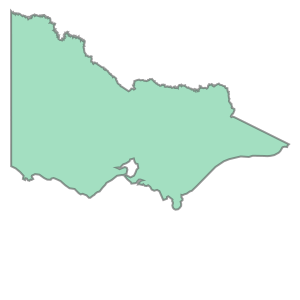

In [14]:
m = GeoModel()

agent = m.space.agents[0]
agent.geometry